In [29]:
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import numpy as np
from sklearn.model_selection import KFold
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
from keras.utils import plot_model
from sklearn.metrics import f1_score
nb_classes = 4

In [2]:
# # data_processed.csv
# # load pima indians dataset
# df = pd.read_csv('data_processed.csv')
# # Get testSet
# df_test = df.sample(frac=0.2, random_state=18)
# df_test.to_csv('testSet.csv', index=False)
# # Subtract to get trainingSet
# df_train = df[~df.index.isin(df_test.index)]
# df_train.to_csv('trainingSet.csv', index=False)

In [3]:
trainingSet = pd.read_csv('trainingSet.csv').sample(frac = 1, random_state=18)
testSet = pd.read_csv('testSet.csv').sample(frac = 1, random_state=18)

In [4]:
Y_raw = np.array(trainingSet['Value'])
trainSet_X = trainingSet.drop('Value', axis=1)
X = np.array(trainSet_X)
Y  = np.zeros((len(trainSet_X), nb_classes))
print Y_raw
for i in range(len(Y_raw)):
    Y[i][Y_raw[i] - 1] = 1.0
print X.shape
Y_raw -= [1]

[1 2 1 ... 1 2 1]
(1141, 921)


In [5]:
# Y_test = np.array(testSet['Value'])
# testSet_X = testSet.drop('Value', axis=1)
# X_test = np.array(testSet_X)
# Y_test = Y_test - [1]

In [6]:
# create model
def generate_model(d):
    model = Sequential()
    for i in reversed(range(d)):
        if i < 1:
            break
        if i == 0:
            model.add(Dense(2 ** (i + 3), input_dim=921, activation='relu'))
#             model.add(Dropout(0.2))
        elif i == 1:
            model.add(Dense(2 ** (i + 3), activation='relu'))
#             model.add(Dropout(0.1))
        elif i == 2:
            model.add(Dense(2 ** (i + 3), activation='relu'))
#             model.add(Dropout(0.05))
        
        else:
            model.add(Dense(2 ** (i + 3), activation='relu'))
    
    # The last layer
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     plot_model(model, to_file= str(d) + 'model.pdf')
    return model

In [7]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)
D = [3, 4, 5, 6, 7, 8, 9, 10]

train_dict = {}
test_dict = {}

for d in D:
    train_dict[d] = []
    test_dict[d] = []
    print 'd = ', d
    for train_index, test_index in kf.split(X):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        Y_train_raw, Y_test_raw = Y_raw[train_index], Y_raw[test_index]
        
        # Fit the model
        model = generate_model(d)
        model.fit(X_train, Y_train, epochs=10, batch_size=10, shuffle=True, class_weight='auto')
        
        # CV Result
        training_res = model.predict(X_train, batch_size=10, verbose=0)
        train_res = np.argmax(training_res, axis=1)
        testing_res = model.predict(X_test, batch_size=10, verbose=0)
        test_res = np.argmax(testing_res, axis=1)
        
        # Get train accuracy
        count = 0
        for i in range((len(X_train))):
            if train_res[i] == Y_train_raw[i]:
                count += 1
        train_dict[d].append(1.0 * count/len(X_train))
        print 1.0 * count/len(X_train)
                             
        # Get test accuracy
        count = 0
        for i in range((len(X_test))):
            if test_res[i] == Y_test_raw[i]:
                count += 1
        test_dict[d].append(1.0 * count/len(X_test))
        print 1.0 * count/len(X_test)

d =  3
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
912/912 [==============================] - 2s 2ms/step - loss: 0.3696 - acc: 0.8492
Epoch 2/10
912/912 [==============================] - 0s 532us/step - loss: 0.3106 - acc: 0.8742
Epoch 3/10
912/912 [==============================] - 0s 508us/step - loss: 0.2735 - acc: 0.8840
Epoch 4/10
912/912 [==============================] - 0s 536us/step - loss: 0.2376 - acc: 0.8947
Epoch 5/10
912/912 [==============================] - 0s 542us/step - loss: 0.2129 - acc: 0.9060
Epoch 6/10
912/912 [==============================] - 1s 554us/step - loss: 0.1876 - acc: 0.9172
Epoch 7/10
912/912 [==============================] - 0s 545us/step - loss: 0.1663 - acc: 0.9287
Epoch 8/10
912/912 [==============================] - 0s 526us/step - loss: 0.1526 - acc: 0.9342
Epoch 9/10
912/912 [==============================] - 0s 548us/step - loss: 0.1524 - acc: 0.9337
Ep

912/912 [==============================] - 1s 758us/step - loss: 0.1293 - acc: 0.9471
Epoch 10/10
912/912 [==============================] - 1s 793us/step - loss: 0.1550 - acc: 0.9323
0.895833333333
0.855895196507
Epoch 1/10
913/913 [==============================] - 2s 2ms/step - loss: 0.4228 - acc: 0.8445
Epoch 2/10
913/913 [==============================] - 1s 781us/step - loss: 0.3173 - acc: 0.8762
Epoch 3/10
913/913 [==============================] - 1s 770us/step - loss: 0.1948 - acc: 0.9137
Epoch 4/10
913/913 [==============================] - 1s 820us/step - loss: 0.2010 - acc: 0.9105
Epoch 5/10
913/913 [==============================] - 1s 744us/step - loss: 0.1518 - acc: 0.9337
Epoch 6/10
913/913 [==============================] - 1s 775us/step - loss: 0.1414 - acc: 0.9403
Epoch 7/10
913/913 [==============================] - 1s 775us/step - loss: 0.1423 - acc: 0.9357
Epoch 8/10
913/913 [==============================] - 1s 780us/step - loss: 0.1167 - acc: 0.9480
Epoch 9/10
9

Epoch 1/10
913/913 [==============================] - 4s 5ms/step - loss: 0.3734 - acc: 0.8513
Epoch 2/10
913/913 [==============================] - 1s 916us/step - loss: 0.2925 - acc: 0.8781
Epoch 3/10
913/913 [==============================] - 1s 876us/step - loss: 0.1867 - acc: 0.9214
Epoch 4/10
913/913 [==============================] - 1s 949us/step - loss: 0.2165 - acc: 0.9058
Epoch 5/10
913/913 [==============================] - 1s 924us/step - loss: 0.1555 - acc: 0.9343
Epoch 6/10
913/913 [==============================] - 1s 931us/step - loss: 0.1507 - acc: 0.9387
Epoch 7/10
913/913 [==============================] - 1s 908us/step - loss: 0.1346 - acc: 0.9450
Epoch 8/10
913/913 [==============================] - 1s 905us/step - loss: 0.1602 - acc: 0.9326
Epoch 9/10
913/913 [==============================] - 1s 860us/step - loss: 0.1276 - acc: 0.9458
Epoch 10/10
913/913 [==============================] - 1s 914us/step - loss: 0.1509 - acc: 0.9324
0.92004381161
0.824561403509
d 

In [8]:
# raw_predictions = model.predict(X_test, batch_size=10, verbose=0)
# print raw_predictions
# predicted = np.argmax(raw_predictions, axis=1)

In [9]:
print train_dict
print test_dict

train_accuracy = []
train_stdrr = []
test_accuracy = []
test_stdrr = []
for d in D:
    train_accuracy.append(np.mean(train_dict[d]))
    train_stdrr.append(np.std(train_dict[d]) / np.sqrt(10))
    test_accuracy.append(np.mean(test_dict[d]))
    test_stdrr.append(np.std(test_dict[d] / np.sqrt(10)))
print train_accuracy
print train_stdrr
print test_accuracy
print test_stdrr

{3: [0.8991228070175439, 0.9101861993428259, 0.9145673603504929, 0.8696604600219058, 0.8860898138006572], 4: [0.9100877192982456, 0.904709748083242, 0.8992332968236583, 0.8521358159912377, 0.9014238773274917], 5: [0.9002192982456141, 0.9211391018619934, 0.9244249726177437, 0.9079956188389924, 0.9145673603504929], 6: [0.8958333333333334, 0.7973713033953997, 0.9003285870755751, 0.8981380065717415, 0.764512595837897], 7: [0.9013157894736842, 0.9090909090909091, 0.8532311062431545, 0.9058050383351588, 0.9200438116100766], 8: [0.8640350877192983, 0.8543263964950711, 0.8674698795180723, 0.882803943044907, 0.8477546549835706], 9: [0.8048245614035088, 0.8324205914567361, 0.9079956188389924, 0.828039430449069, 0.8751369112814896], 10: [0.7094298245614035, 0.8378970427163198, 0.7842278203723987, 0.8773274917853231, 0.8882803943044907]}
{3: [0.8602620087336245, 0.8640350877192983, 0.8552631578947368, 0.868421052631579, 0.868421052631579], 4: [0.9082969432314411, 0.8333333333333334, 0.828947368421

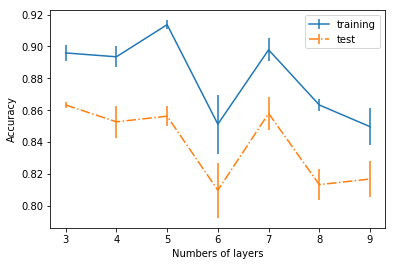

In [10]:
plt.figure()
param_range = 7
plt.errorbar(D[0:param_range], train_accuracy[0:param_range], train_stdrr[0:param_range], label='training', linestyle='-')
plt.errorbar(D[0:param_range], test_accuracy[0:param_range], test_stdrr[0:param_range], label='test', linestyle='-.')
# plt.ylim((0.50, 1.00))
plt.xlabel('Numbers of layers')
plt.ylabel('Accuracy')

plt.legend()
plt.savefig('./NN.pdf')
plt.show()

In [22]:
model = generate_model(6)
model.fit(X_train, Y_train, epochs=30, batch_size=10, shuffle=True, class_weight='auto')

Epoch 1/30
913/913 [==============================] - 9s 9ms/step - loss: 0.3974 - acc: 0.8456
Epoch 2/30
913/913 [==============================] - 1s 966us/step - loss: 0.3126 - acc: 0.8699
Epoch 3/30
913/913 [==============================] - 1s 971us/step - loss: 0.2448 - acc: 0.8995
Epoch 4/30
913/913 [==============================] - 1s 919us/step - loss: 0.1734 - acc: 0.9255
Epoch 5/30
913/913 [==============================] - 1s 932us/step - loss: 0.1568 - acc: 0.9354
Epoch 6/30
913/913 [==============================] - 1s 964us/step - loss: 0.1653 - acc: 0.9321
Epoch 7/30
913/913 [==============================] - 1s 951us/step - loss: 0.1378 - acc: 0.9400
Epoch 8/30
913/913 [==============================] - 1s 965us/step - loss: 0.1307 - acc: 0.9452
Epoch 9/30
913/913 [==============================] - 1s 918us/step - loss: 0.1143 - acc: 0.9521
Epoch 10/30
913/913 [==============================] - 1s 987us/step - loss: 0.1342 - acc: 0.9430
Epoch 11/30
913/913 [==========

In [23]:
Y_raw = np.array(testSet['Value'])
testSet_X = testSet.drop('Value', axis=1)
X = np.array(testSet_X)
Y  = np.zeros((len(testSet_X), nb_classes))
print Y_raw
print X.shape
Y_raw -= [1]

[1 1 1 1 1 1 3 1 1 1 2 1 2 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1
 1 1 1 1 2 3 1 1 2 1 1 2 2 1 1 1 1 1 4 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1 4 4 1
 1 1 1 1 3 1 1 2 1 1 2 1 1 2 1 1 3 2 1 1 1 1 1 2 1 2 4 1 2 2 1 3 1 3 1 4 2
 1 2 1 1 2 1 1 1 1 1 3 1 1 1 1 1 1 1 3 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 2 1 1 1 1 3 1 1 2 1 1 1 3 1 1 1 1 1 1 3 2 1 1 1 1 3 1 2 1 1 1 2 2 1 1 1 1
 2 2 2 1 2 2 4 1 1 3 1 4 1 1 1 1 1 1 1 1 3 4 2 3 1 1 3 1 3 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 2 2 2 1 1 1 2 1 1 1 1 3 1 3 2 2 4 4 2
 1 1 1 1 1 3 1 2 3 1 4 1 1 1 4 2 1 1 3 1 1 1 2 1 1 1]
(285, 921)


In [24]:
test_res = model.predict(X, batch_size=10, verbose=0)
res = np.argmax(test_res, axis=1)

In [25]:
# Get test accuracy
CM  = np.zeros((nb_classes, nb_classes))
print res[i]
for i in range((len(X))):
    CM[res[i]][Y_raw[i]] += 1
print CM

0
[[192.  12.   0.   0.]
 [  5.  39.  16.   2.]
 [  0.   2.   6.   8.]
 [  0.   0.   0.   3.]]


In [30]:
print f1_score(res,Y_raw,average='macro')

0.5816640820717086


In [31]:
print f1_score(res,Y_raw,average='micro')

0.8421052631578947
